<a href="https://colab.research.google.com/github/Daarini1501/CODSOFT/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving advertising.csv to advertising.csv
Dataset Head:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Dataset Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      

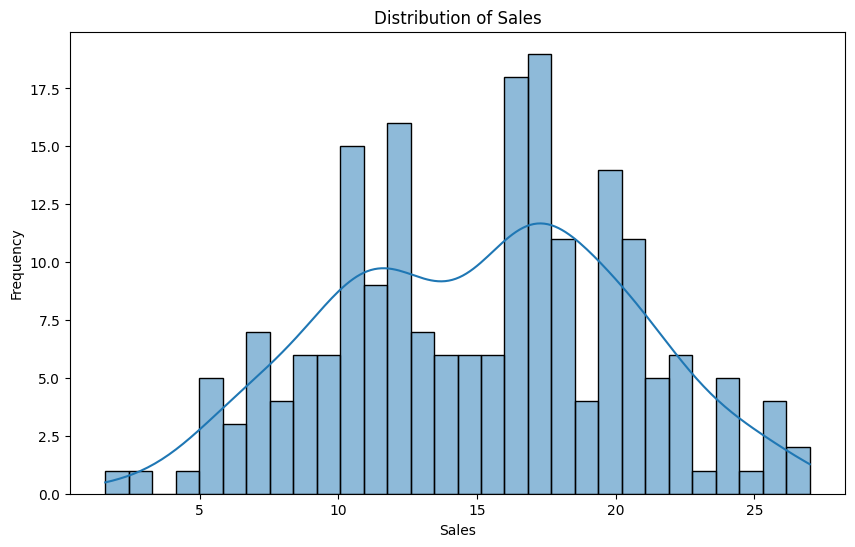

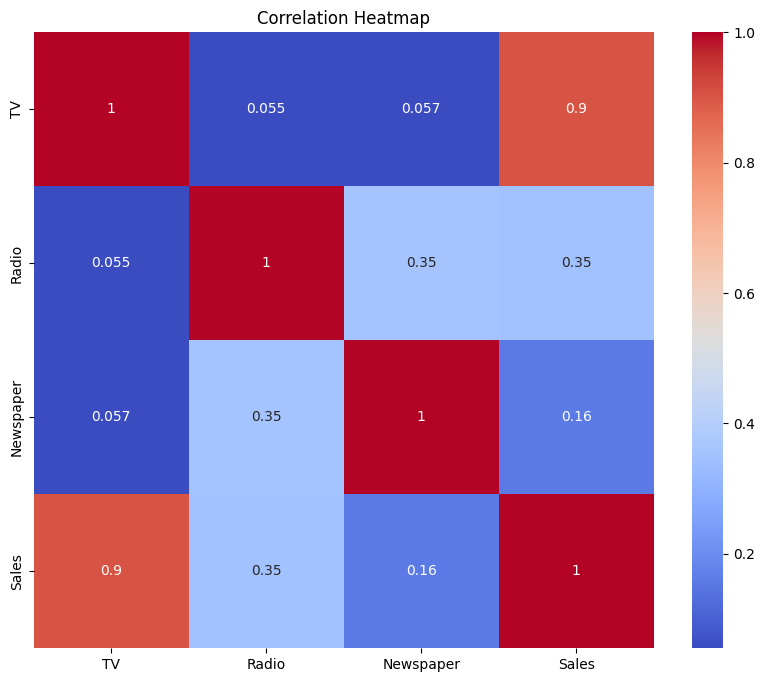


Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


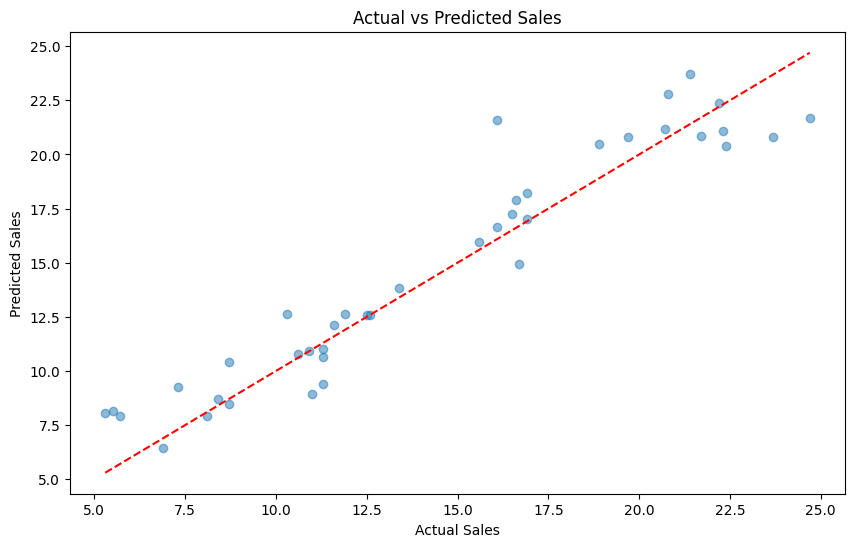

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Step 1: Install Required Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Upload Dataset
from google.colab import files
uploaded = files.upload()

# Step 4: Load Dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name)

# Display the first 5 rows
print("Dataset Head:")
print(df.head())

# Check dataset info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nDataset Statistics:")
print(df.describe())

# Step 5: Data Visualization
# 1. Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# 2. Sales Over Time (if you have a date column)
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Order Date', y='Sales', data=df)
    plt.title('Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Sales by Category (if applicable)
if 'Category' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
    plt.title('Total Sales by Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.show()

# Step 6: Preprocess Data for Sales Prediction
# Handle missing values (if any)
df = df.fillna(df.mean())

# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Split data into features (X) and target (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Sales Prediction Model
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nMean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 8: Visualize Predictions vs Actual Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Step 9: Save Predictions to a CSV (Optional)
predictions = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
predictions.to_csv('sales_predictions.csv', index=False)
files.download('sales_predictions.csv')  # Download the predictions file